In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from fbprophet import Prophet

In [8]:
data=pd.read_csv("TSLA.csv",parse_dates=True)

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,102.052002,103.330002,98.246002,100.426003,100.426003,59990500
1,2020-03-31,100.250000,108.592003,99.400002,104.800003,104.800003,88857500
2,2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000
3,2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000
4,2020-04-03,101.900002,103.098000,93.678001,96.001999,96.001999,112810500


In [10]:
data.shape

(251, 7)

In [11]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Text(0, 0.5, 'Close')

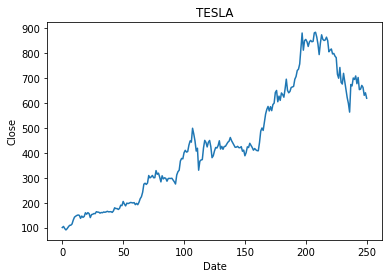

In [14]:
ax=data["Close"].plot(title="TESLA")
ax.set_xlabel("Date")
ax.set_ylabel("Close")

In [16]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)

In [21]:
data_final = data[["Date", "Close"]]

In [31]:
#For fbprophet.prophet,Dataframe must have columns "ds" and "y" with the dates and values respectively.
data_final = data_final.rename(columns={"Date" : "ds", "Close" : "y" })

In [32]:
model = Prophet()
model.fit(data_final)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-30,85.007010,27.824306,139.434847
1,2020-03-31,88.667176,27.146023,144.769982
2,2020-04-01,89.965475,32.375826,149.125489
3,2020-04-02,90.920047,36.617946,149.752281
4,2020-04-03,92.170902,38.585925,149.749466


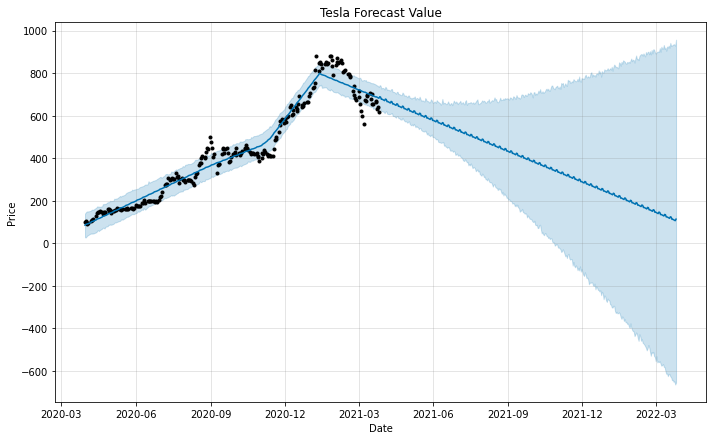

In [39]:
model.plot(forcast, xlabel="Date", ylabel="Price")
plt.title("Tesla Forecast Value")
plt.show()